In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Probelem statement 

Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.

Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level




In [2]:
df=pd.read_csv('election_data.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [3]:
df.shape


(1213, 28)

(i) Loaded the dataset in dataframe df

(ii) Dataset has 28 columns and 1213 rows

In [4]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,1213.000000,1213.0,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.0,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,5.453421,0.0,26.870569,358.355317,111.887881,926.678483,2.411319,868.944765,2.183735,51.861204,...,1.876340,54.099275,79257.338829,41343.248969,0.0,4.956059,5.193355,1739.174773,1.307502,1.307502
std,4.500698,0.0,55.618238,750.239047,236.571623,1937.646076,0.751206,1820.497416,0.514144,3.959896,...,0.466179,4.876772,166293.969636,86681.128053,0.0,10.931462,11.456085,9611.501174,7.502381,7.814701
min,0.000000,0.0,2.000000,54.000000,3.000000,19.000000,0.550000,39.000000,1.340000,42.880000,...,1.140000,45.140000,6383.000000,3215.000000,0.0,0.020000,0.020000,1.000000,0.000000,0.000000
25%,0.000000,0.0,4.000000,75.000000,12.000000,138.000000,1.910000,117.000000,1.840000,49.120000,...,1.630000,50.380000,14191.000000,8146.000000,0.0,0.220000,0.220000,26.000000,0.000000,0.000000
50%,5.000000,0.0,9.000000,147.000000,23.000000,268.000000,2.490000,230.000000,2.160000,52.240000,...,1.910000,55.080000,22356.000000,12251.000000,0.0,0.520000,0.540000,89.000000,0.000000,0.000000
75%,10.000000,0.0,18.000000,242.000000,96.000000,735.000000,2.890000,740.000000,2.490000,55.330000,...,2.050000,57.400000,57540.000000,31957.000000,0.0,2.390000,2.500000,492.000000,0.000000,0.000000
max,15.000000,0.0,226.000000,3092.000000,1081.000000,9652.000000,3.870000,8874.000000,3.350000,57.360000,...,3.120000,62.580000,813743.000000,428546.000000,0.0,49.110000,51.420000,147993.000000,94.000000,106.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               1213 non-null   int64  
 1   time                      1213 non-null   object 
 2   territoryName             1213 non-null   object 
 3   totalMandates             1213 non-null   int64  
 4   availableMandates         1213 non-null   int64  
 5   numParishes               1213 non-null   int64  
 6   numParishesApproved       1213 non-null   int64  
 7   blankVotes                1213 non-null   int64  
 8   blankVotesPercentage      1213 non-null   float64
 9   nullVotes                 1213 non-null   int64  
 10  nullVotesPercentage       1213 non-null   float64
 11  votersPercentage          1213 non-null   float64
 12  subscribedVoters          1213 non-null   int64  
 13  totalVoters               1213 non-null   int64  
 14  pre.blan

object cols - 03

numerical cols- 25

As the target is numberical so its a regression problem

In [6]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

There is no null data in the dataset

# EDA

<AxesSubplot:xlabel='TimeElapsed', ylabel='Density'>

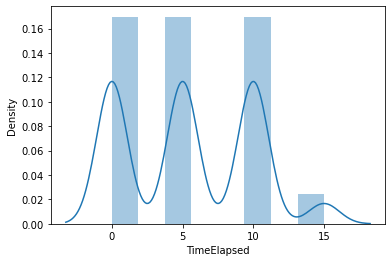

In [7]:
sns.distplot(df['TimeElapsed'])

In [8]:
df['TimeElapsed'].value_counts()

0     386
5     386
10    386
15     55
Name: TimeElapsed, dtype: int64

In [9]:
df['territoryName'].value_counts()

Territory National    84
Aveiro                80
Beja                  65
Porto                 63
Leiria                63
Braga                 63
Coimbra               60
Lisboa                60
Madeira               60
Setabal               60
Viana do Castelo      60
Viseu                 60
Avora                 57
Faro                  57
Guarda                57
Santaraam             57
Castelo Branco        54
Bragana               54
Portalegre            51
Vila Real             48
Name: territoryName, dtype: int64

<AxesSubplot:ylabel='None'>

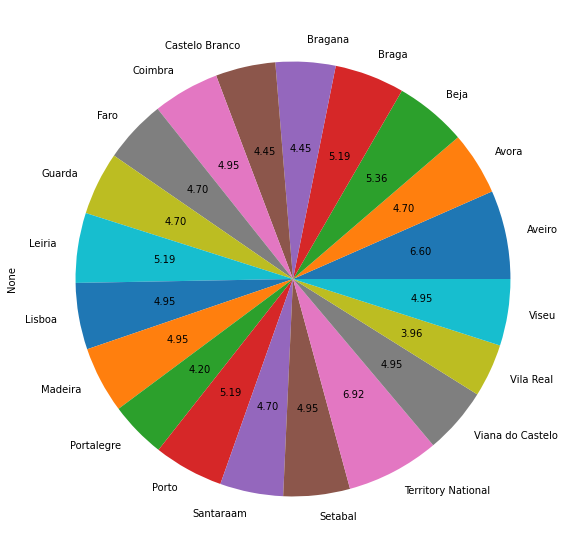

In [10]:
plt.rcParams['figure.figsize']=(10,10)
df.groupby(['territoryName']).size().plot(kind='pie',autopct='%.2f')

In [11]:
m= len(pd.unique(df['territoryName']))
print(m)

20


(i) There are twenty territories for which election data is being collectHed

(ii) The highest number of occurance in National Territory - 84 and lowest nummber is Vila Real - 48


In [12]:
df['totalMandates'].value_counts()

0    1213
Name: totalMandates, dtype: int64

totalMandates i.e  MP's elected at the moment is 0 for all the data, so we can drop this column

In [13]:
df['availableMandates'].value_counts()

3      233
9      174
6      120
226     84
16      80
19      63
10      63
40      63
48      60
18      60
8       60
4       54
2       51
5       48
Name: availableMandates, dtype: int64

In [14]:
available_mandates=df.groupby('territoryName')[['availableMandates']].sum()
print(available_mandates)

                    availableMandates
territoryName                        
Aveiro                           1280
Avora                             171
Beja                              195
Braga                            1197
Bragana                           162
Castelo Branco                    216
Coimbra                           540
Faro                              513
Guarda                            171
Leiria                            630
Lisboa                           2880
Madeira                           360
Portalegre                        102
Porto                            2520
Santaraam                         513
Setabal                          1080
Territory National              18984
Viana do Castelo                  360
Vila Real                         240
Viseu                             480


<AxesSubplot:xlabel='territoryName'>

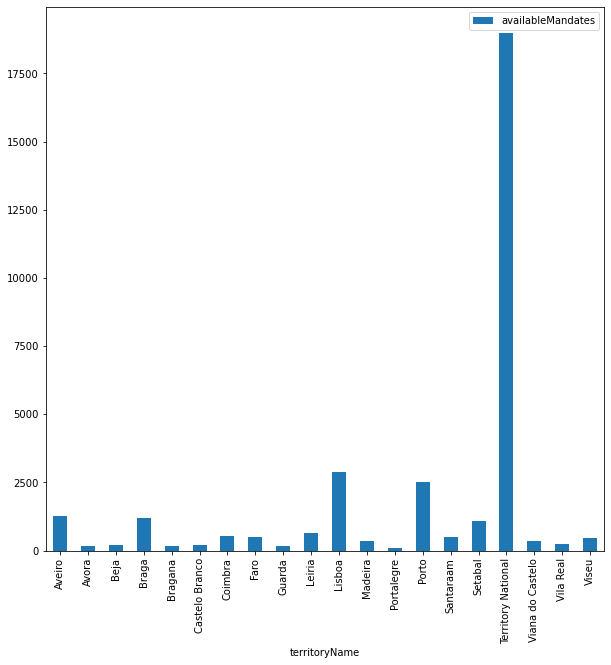

In [15]:
available_mandates.plot(kind='bar')

Territoy wise available MP's is shown above

In [16]:
df['numParishes'].value_counts()

69      108
3092     84
147      80
75       65
347      63
243      63
110      63
134      60
208      60
55       60
54       60
277      60
155      60
67       57
141      57
242      57
120      54
226      54
197      48
Name: numParishes, dtype: int64

In [17]:
num_parishes=df.groupby('territoryName')[['numParishes']].sum()
print(num_parishes)

                    numParishes
territoryName                  
Aveiro                    11760
Avora                      3933
Beja                       4875
Braga                     21861
Bragana                   12204
Castelo Branco             6480
Coimbra                    9300
Faro                       3819
Guarda                    13794
Leiria                     6930
Lisboa                     8040
Madeira                    3240
Portalegre                 3519
Porto                     15309
Santaraam                  8037
Setabal                    3300
Territory National       259728
Viana do Castelo          12480
Vila Real                  9456
Viseu                     16620


<AxesSubplot:xlabel='territoryName'>

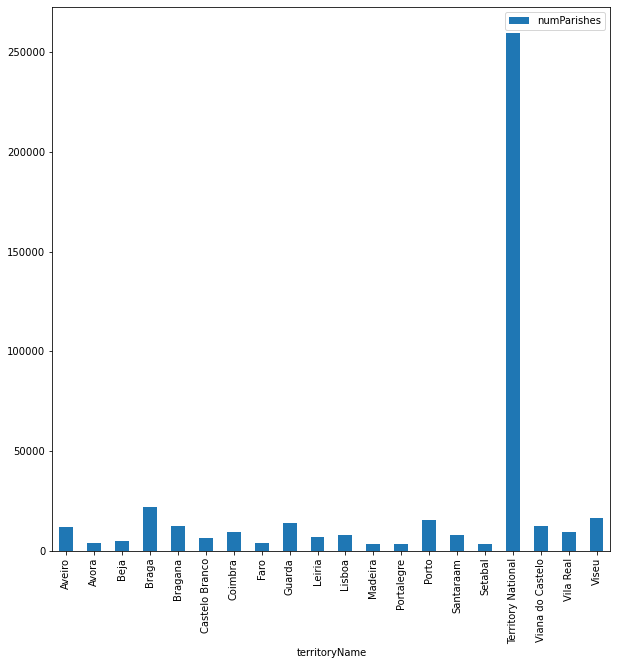

In [18]:
num_parishes.plot(kind='bar')

In [19]:
num_parishes_app=df.groupby('territoryName')[['numParishesApproved']].sum()
print(num_parishes_app)

                    numParishesApproved
territoryName                          
Aveiro                              960
Avora                              1197
Beja                               1495
Braga                              3843
Bragana                            5184
Castelo Branco                     3942
Coimbra                            1920
Faro                                855
Guarda                             9861
Leiria                              756
Lisboa                              360
Madeira                             580
Portalegre                         1173
Porto                              1323
Santaraam                          2280
Setabal                             180
Territory National                80535
Viana do Castelo                   5760
Vila Real                          4336
Viseu                              9180


<AxesSubplot:xlabel='territoryName'>

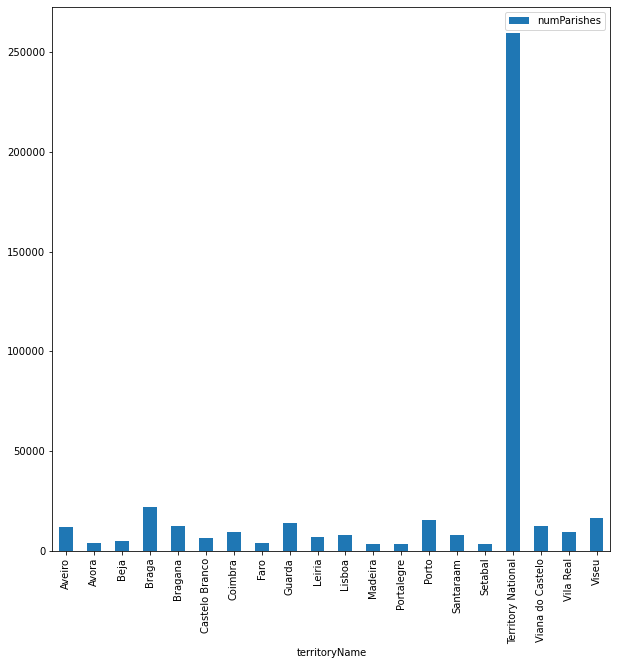

In [20]:
num_parishes.plot(kind='bar')

In [21]:
df['blankVotes'].value_counts()

186     80
125     65
291     63
7225    63
888     63
223     63
903     60
40      60
127     60
376     60
1485    60
735     57
239     57
138     57
609     57
593     54
268     54
136     51
19      40
584     32
9652    21
39      20
453     16
Name: blankVotes, dtype: int64

In [22]:
blank_votes=df.groupby('territoryName')[['blankVotes']].sum()
print(blank_votes)

                    blankVotes
territoryName                 
Aveiro                   14880
Avora                     7866
Beja                      8125
Braga                    55944
Bragana                  14472
Castelo Branco           32022
Coimbra                  22560
Faro                     13623
Guarda                   41895
Leiria                   18333
Lisboa                    7620
Madeira                   1540
Portalegre                6936
Porto                    14049
Santaraam                34713
Setabal                   2400
Territory National      657867
Viana do Castelo         54180
Vila Real                25936
Viseu                    89100


<AxesSubplot:xlabel='territoryName'>

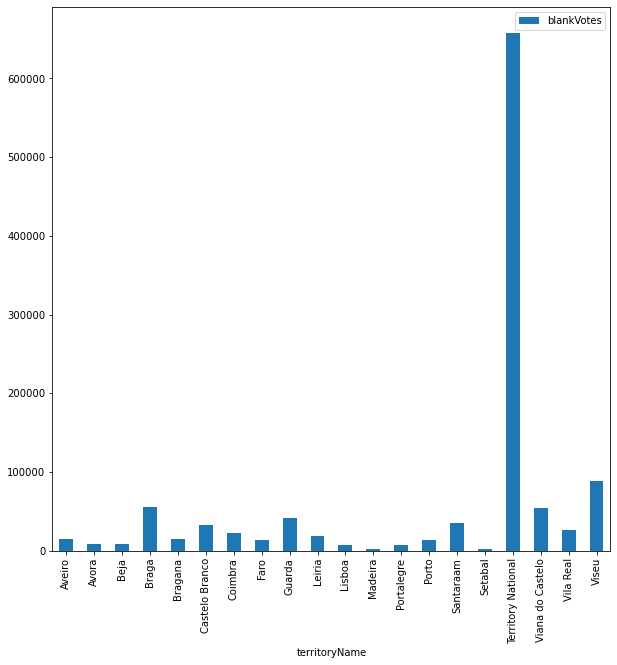

In [23]:
blank_votes.plot(kind='bar')

In [24]:
df['blankVotesPercentage'].value_counts()

2.89    123
2.49    120
2.92     80
1.69     65
1.93     63
3.87     63
3.50     60
2.60     60
2.78     60
1.41     60
1.72     57
3.26     57
2.65     57
2.36     54
1.91     54
1.86     51
0.59     40
2.04     32
2.50     21
0.55     20
1.98     16
Name: blankVotesPercentage, dtype: int64

In [25]:
blank_vote_pct=df.groupby('territoryName')[['blankVotesPercentage']].mean()
print(blank_vote_pct)

                    blankVotesPercentage
territoryName                           
Aveiro                          2.920000
Avora                           1.720000
Beja                            1.690000
Braga                           2.890000
Bragana                         1.910000
Castelo Branco                  2.360000
Coimbra                         3.500000
Faro                            3.260000
Guarda                          2.490000
Leiria                          3.870000
Lisboa                          2.780000
Madeira                         0.576667
Portalegre                      1.860000
Porto                           1.930000
Santaraam                       2.650000
Setabal                         1.410000
Territory National              2.492500
Viana do Castelo                2.890000
Vila Real                       2.020000
Viseu                           2.600000


<AxesSubplot:xlabel='territoryName'>

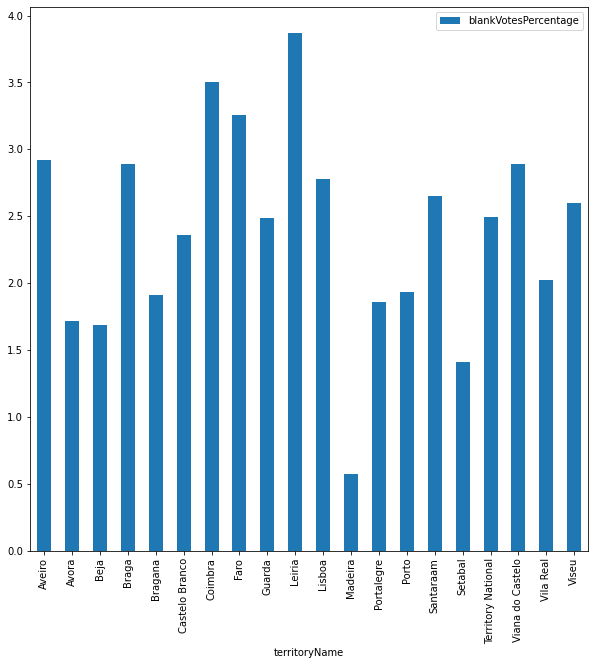

In [26]:
blank_vote_pct.plot(kind='bar')

In [27]:
nullVotes=df.groupby('territoryName')[['nullVotes']].sum().reset_index()
nullVotes

,territoryName,nullVotes
0,Aveiro,8080
1,Avora,6156
2,Beja,8840
3,Braga,64827
4,Bragana,17442
5,Castelo Branco,39960
6,Coimbra,17040
7,Faro,8493
8,Guarda,47196
9,Leiria,11088


<AxesSubplot:xlabel='territoryName', ylabel='nullVotes'>

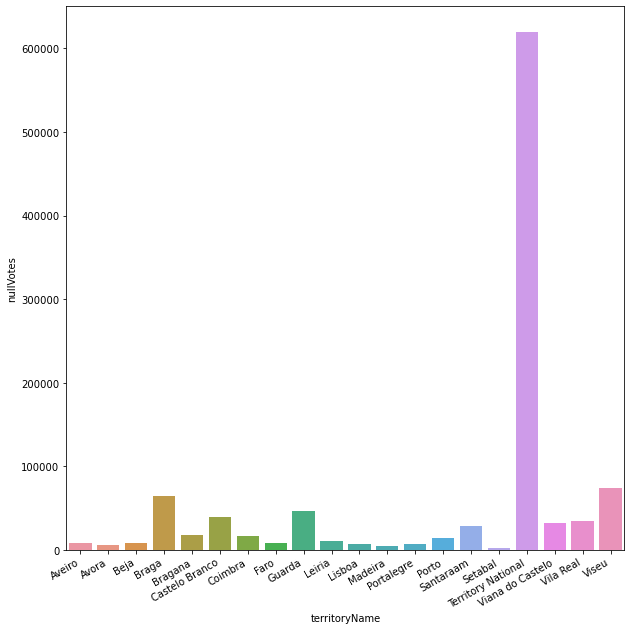

In [28]:
plt.xticks(rotation=30,ha='right')
sns.barplot(x='territoryName',y='nullVotes',data=nullVotes)

In [29]:
df['Party'].value_counts()

PS           63
PCTP/MRPP    63
PNR          63
PDR          63
IL           63
PPD/PSD      63
A            63
L            63
CH           63
PAN          63
PCP-PEV      63
CDS-PP       63
B.E.         63
R.I.R.       59
PPM          59
MPT          57
NC           56
PURP         56
PTP          56
JPP          29
MAS          22
Name: Party, dtype: int64

<AxesSubplot:xlabel='Party', ylabel='count'>

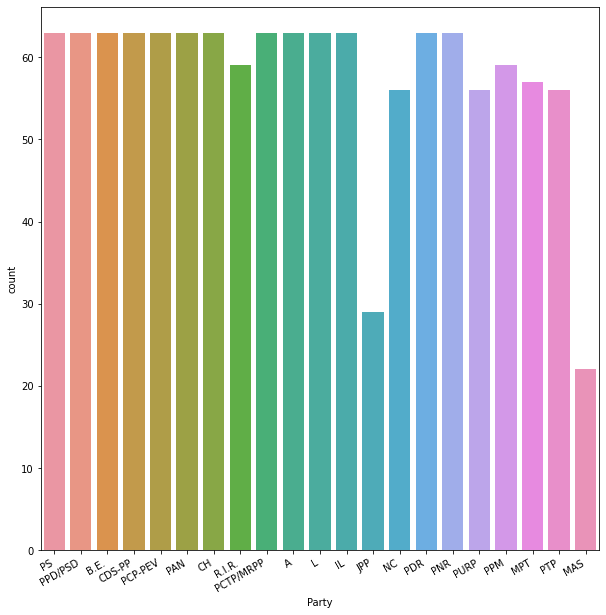

In [30]:
plt.xticks(rotation=30,ha='right')

sns.countplot(df.Party)

In [31]:
df.groupby('territoryName')[['Mandates']].sum()

,Mandates
territoryName,
Aveiro,0
Avora,0
Beja,0
Braga,0
Bragana,0
Castelo Branco,0
Coimbra,0
Faro,0
Guarda,0


<AxesSubplot:xlabel='territoryName'>

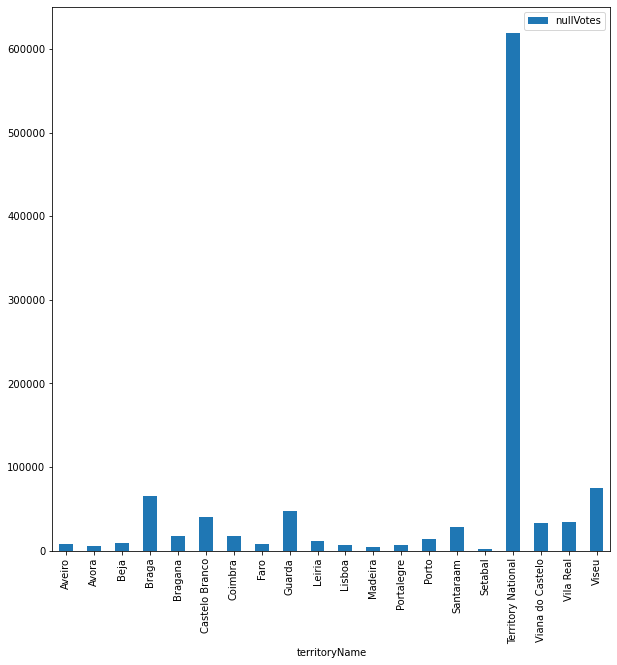

In [32]:
WnullVotes=df.groupby('territoryName')[['nullVotes']].sum().plot(kind='bar')
WnullVotes

In [33]:
df['Mandates'].value_counts()

0    1213
Name: Mandates, dtype: int64

(i) There is no mandates
Mandates columns all values are zero so we can drop it

In [34]:
df['Percentage'].value_counts()

0.17    36
0.20    35
0.21    27
0.18    25
0.25    25
        ..
1.76     1
4.59     1
4.90     1
6.81     1
0.04     1
Name: Percentage, Length: 219, dtype: int64

In [35]:
vote_percentage=df.groupby('Party')[['Percentage']].mean().reset_index().sort_values(by='Percentage',ascending=False)
vote_percentage

,Party,Percentage
17,PS,38.545238
15,PPD/PSD,30.794444
1,B.E.,6.999683
11,PCP-PEV,6.871429
2,CDS-PP,4.664762
10,PAN,1.812540
3,CH,1.076032
20,R.I.R.,0.929153
12,PCTP/MRPP,0.829048
6,L,0.513175


<AxesSubplot:xlabel='Party', ylabel='Percentage'>

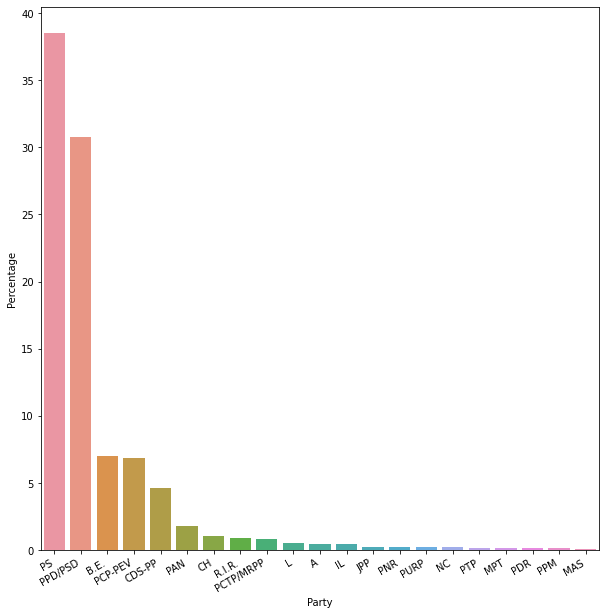

In [36]:
plt.xticks(rotation=30,ha='right')

sns.barplot(x='Party',y='Percentage',data=vote_percentage)

(i) Vote percentage for the PS party is at the highest position

(ii) PPD/PSD and B.E is in the second and third position

(iii) PDR,PPM,MAS are at last postion

In [37]:
territory_percentage=df.groupby('territoryName')[['Percentage']].mean()
territory_percentage

,Percentage
territoryName,
Aveiro,4.775500
Avora,5.101579
Beja,5.930308
Braga,4.465238
Bragana,5.321667
Castelo Branco,5.260556
Coimbra,4.691500
Faro,4.985263
Guarda,4.983684


In [38]:
party_vote_pct=df.groupby('territoryName')[['Votes']].mean()
party_vote_pct

,Votes
territoryName,
Aveiro,304.200000
Avora,410.263158
Beja,437.923077
Braga,1370.095238
Bragana,748.500000
Castelo Branco,1319.166667
Coimbra,503.400000
Faro,365.894737
Guarda,1470.052632


In [39]:
party_vote_p=df.groupby('Party')[['Votes']].sum()
party_vote_p

,Votes
Party,
A,10730
B.E.,149594
CDS-PP,109075
CH,20934
IL,9557
JPP,2829
L,10705
MAS,465
MPT,3647


<AxesSubplot:xlabel='Party'>

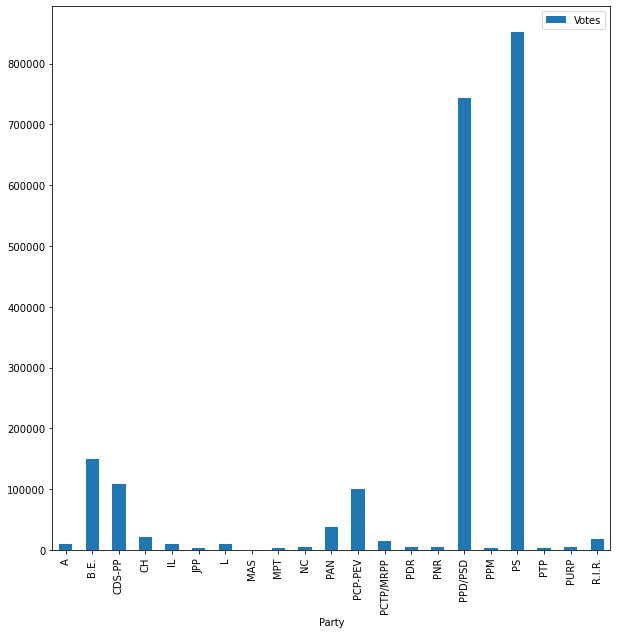

In [40]:
party_vote_p.plot(kind='bar')

In [41]:
Number_of_MPs=df.groupby('territoryName')[['Hondt']].sum().reset_index().sort_values(by='Hondt',ascending=False)
Number_of_MPs

,territoryName,Hondt
16,Territory National,904
10,Lisboa,144
13,Porto,120
0,Aveiro,64
3,Braga,57
15,Setabal,54
9,Leiria,30
6,Coimbra,27
7,Faro,27
14,Santaraam,27


In [42]:
#according to distribution of votes top ten location 
top_ten_locationwise_mps=Number_of_MPs.head(10)
top_ten_locationwise_mps

,territoryName,Hondt
16,Territory National,904
10,Lisboa,144
13,Porto,120
0,Aveiro,64
3,Braga,57
15,Setabal,54
9,Leiria,30
6,Coimbra,27
7,Faro,27
14,Santaraam,27


<AxesSubplot:xlabel='Party', ylabel='Votes'>

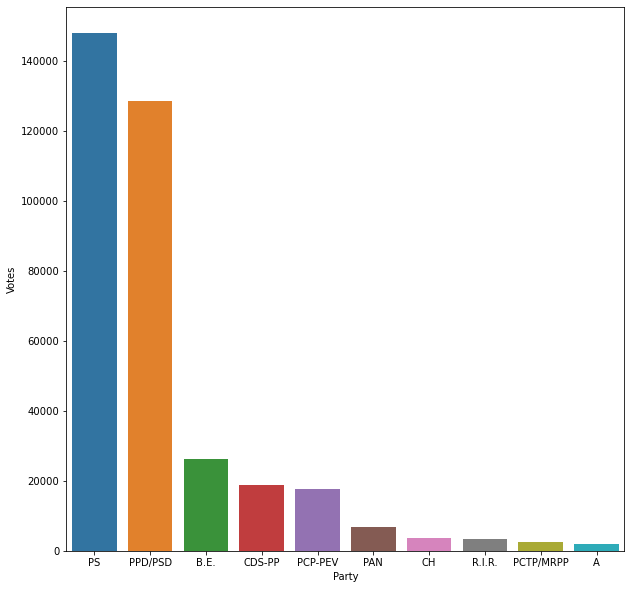

In [43]:
top_parties=df[['Votes','Party']].head(10)
sns.barplot(x='Party',y='Votes',data=top_parties)

Top ten parties with their votes percentages is mentioned above


In [44]:
df['TimeElapsed'].value_counts()

0     386
5     386
10    386
15     55
Name: TimeElapsed, dtype: int64

In [45]:
top_ten_votes=df.sort_values(by='Votes',ascending=False).head(10)

In [46]:
    top_ten_votes

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
386,5,06-10-2019 20:15,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PS,0,38.41,40.37,111442,94,106
772,10,06-10-2019 20:20,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PS,0,38.41,40.37,111442,94,106
1158,15,06-10-2019 20:25,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PS,0,38.41,40.37,111442,94,106
773,10,06-10-2019 20:20,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PPD/PSD,0,33.69,35.41,97734,82,77
387,5,06-10-2019 20:15,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PPD/PSD,0,33.69,35.41,97734,82,77
1159,15,06-10-2019 20:25,Territory National,0,226,3092,918,7225,2.49,6868,...,51.97,626876,325776,PPD/PSD,0,33.69,35.41,97734,82,77
2,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
366,0,06-10-2019 20:10,Viseu,0,8,277,153,1485,2.60,1242,...,49.48,128277,63473,PPD/PSD,0,36.85,38.69,21054,4,4


In [47]:
top_ten_votes[['territoryName','Votes','Party','time','TimeElapsed','availableMandates','blankVotes','nullVotes','FinalMandates']]

,territoryName,Votes,Party,time,TimeElapsed,availableMandates,blankVotes,nullVotes,FinalMandates
0,Territory National,147993,PS,06-10-2019 20:10,0,226,9652,8874,106
1,Territory National,128624,PPD/PSD,06-10-2019 20:10,0,226,9652,8874,77
386,Territory National,111442,PS,06-10-2019 20:15,5,226,7225,6868,106
772,Territory National,111442,PS,06-10-2019 20:20,10,226,7225,6868,106
1158,Territory National,111442,PS,06-10-2019 20:25,15,226,7225,6868,106
773,Territory National,97734,PPD/PSD,06-10-2019 20:20,10,226,7225,6868,77
387,Territory National,97734,PPD/PSD,06-10-2019 20:15,5,226,7225,6868,77
1159,Territory National,97734,PPD/PSD,06-10-2019 20:25,15,226,7225,6868,77
2,Territory National,26307,B.E.,06-10-2019 20:10,0,226,9652,8874,19
366,Viseu,21054,PPD/PSD,06-10-2019 20:10,0,8,1485,1242,4


Top ten vote gainers and their details

In [48]:
bottom_ten_votes=df.sort_values(by='Votes',ascending=False).tail(10)


In [49]:
bottom_ten_votes[['territoryName','Votes','Party','time','TimeElapsed','availableMandates','blankVotes','nullVotes','FinalMandates']]

,territoryName,Votes,Party,time,TimeElapsed,availableMandates,blankVotes,nullVotes,FinalMandates
1041,Portalegre,4,PTP,06-10-2019 20:20,10,2,136,139,0
812,Aveiro,4,PDR,06-10-2019 20:20,10,16,186,101,0
328,Setabal,4,MPT,06-10-2019 20:10,0,18,40,39,0
1100,Setabal,4,MPT,06-10-2019 20:20,10,18,40,39,0
1099,Setabal,4,MAS,06-10-2019 20:20,10,18,40,39,0
40,Aveiro,4,PDR,06-10-2019 20:10,0,16,186,101,0
426,Aveiro,4,PDR,06-10-2019 20:15,5,16,186,101,0
1024,Madeira,3,NC,06-10-2019 20:20,10,6,39,117,0
252,Madeira,1,NC,06-10-2019 20:10,0,6,19,60,0
638,Madeira,1,NC,06-10-2019 20:15,5,6,19,60,0


Last ten vote gainers and details

In [50]:
top_ten_winners=df.sort_values(by='FinalMandates',ascending=False).head(10)


In [51]:
top_ten_winners[['territoryName','Votes','Party','time','TimeElapsed','availableMandates','blankVotes','nullVotes','FinalMandates']]

,territoryName,Votes,Party,time,TimeElapsed,availableMandates,blankVotes,nullVotes,FinalMandates
0,Territory National,147993,PS,06-10-2019 20:10,0,226,9652,8874,106
1158,Territory National,111442,PS,06-10-2019 20:25,15,226,7225,6868,106
772,Territory National,111442,PS,06-10-2019 20:20,10,226,7225,6868,106
386,Territory National,111442,PS,06-10-2019 20:15,5,226,7225,6868,106
1,Territory National,128624,PPD/PSD,06-10-2019 20:10,0,226,9652,8874,77
1159,Territory National,97734,PPD/PSD,06-10-2019 20:25,15,226,7225,6868,77
387,Territory National,97734,PPD/PSD,06-10-2019 20:15,5,226,7225,6868,77
773,Territory National,97734,PPD/PSD,06-10-2019 20:20,10,226,7225,6868,77
599,Lisboa,1584,PS,06-10-2019 20:15,5,48,127,114,20
985,Lisboa,1584,PS,06-10-2019 20:20,10,48,127,114,20


Details of top ten winner MPs and their details are listed

In [52]:
bottom_ten_MPs=df.sort_values(by='FinalMandates',ascending=False).tail(10)


In [53]:
bottom_ten_MPs[['territoryName','Votes','Party','time','TimeElapsed','availableMandates','blankVotes','nullVotes','FinalMandates']]

,territoryName,Votes,Party,time,TimeElapsed,availableMandates,blankVotes,nullVotes,FinalMandates
450,Braga,258,R.I.R.,06-10-2019 20:15,5,19,888,1029,0
451,Braga,188,CH,06-10-2019 20:15,5,19,888,1029,0
452,Braga,152,IL,06-10-2019 20:15,5,19,888,1029,0
453,Braga,149,A,06-10-2019 20:15,5,19,888,1029,0
454,Braga,146,PCTP/MRPP,06-10-2019 20:15,5,19,888,1029,0
455,Braga,138,L,06-10-2019 20:15,5,19,888,1029,0
456,Braga,74,MPT,06-10-2019 20:15,5,19,888,1029,0
457,Braga,61,NC,06-10-2019 20:15,5,19,888,1029,0
458,Braga,51,PDR,06-10-2019 20:15,5,19,888,1029,0
1212,Beja,12,PNR,06-10-2019 20:25,15,3,125,136,0


bottom ten MPs and details as given above

In [54]:
zero_mandates=df[df['FinalMandates']==0]
zero_mandates

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
7,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,R.I.R.,0,0.88,0.93,3412,2,0
8,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCTP/MRPP,0,0.66,0.70,2567,1,0
9,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,A,0,0.48,0.51,1870,1,0
12,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,JPP,0,0.32,0.34,1236,0,0
13,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,NC,0,0.21,0.22,794,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,IL,0,0.39,0.41,29,0,0
1209,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,A,0,0.30,0.31,22,0,0
1210,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,MPT,0,0.27,0.28,20,0,0
1211,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,PDR,0,0.20,0.21,15,0,0


In [55]:
zero_mandates.shape

(991, 28)

In [56]:
df2=df.copy()

In [57]:
df2['TimeElapsed'].value_counts()

0     386
5     386
10    386
15     55
Name: TimeElapsed, dtype: int64

In [58]:
df2['TimeElapsed'].replace([0,5,10,15],['just_now','5 Min','10 Min','15 Min'],inplace=True)

In [59]:
phasewise_mandates=df2.groupby('TimeElapsed')[['FinalMandates']].sum().reset_index()
phasewise_mandates

,TimeElapsed,FinalMandates
0,10 Min,447
1,15 Min,245
2,5 Min,447
3,just_now,447


In [60]:
import datetime 
from datetime import datetime as dt
df['time']=df['time'].str.slice(11,16)

In [61]:
df['time'].head()

0    20:10
1    20:10
2    20:10
3    20:10
4    20:10
Name: time, dtype: object

In [62]:
df['time_seconds']=df['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [63]:
df['time_seconds'].head()

0    1210
1    1210
2    1210
3    1210
4    1210
Name: time_seconds, dtype: int64

<AxesSubplot:xlabel='FinalMandates', ylabel='Proportion'>

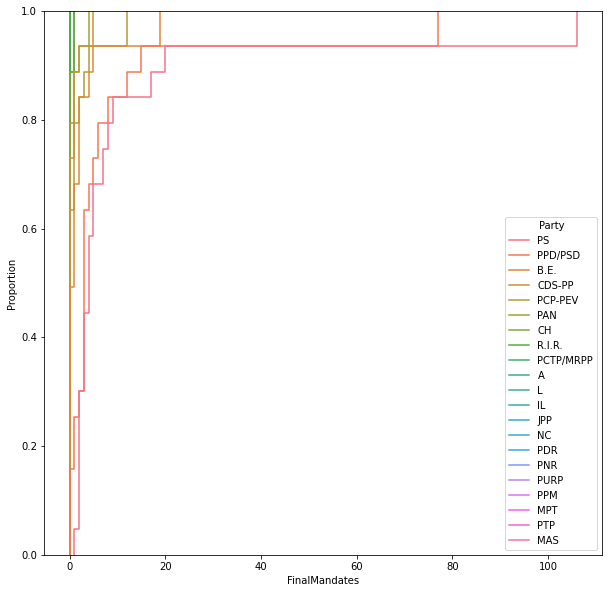

In [64]:
sns.ecdfplot(x='FinalMandates',data=df,hue='Party')

In [65]:
party_finalmandates=df.groupby('Party')[['FinalMandates']].sum().reset_index().sort_values(by='FinalMandates',ascending=False)
party_finalmandates

,Party,FinalMandates
17,PS,742
15,PPD/PSD,539
1,B.E.,135
11,PCP-PEV,85
2,CDS-PP,36
10,PAN,28
3,CH,7
4,IL,7
6,L,7
14,PNR,0


<AxesSubplot:xlabel='Party', ylabel='FinalMandates'>

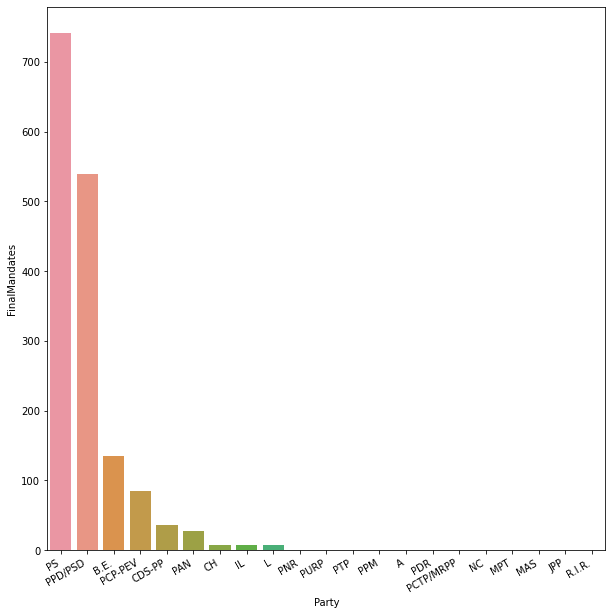

In [66]:
plt.xticks(rotation='30',ha='right')
sns.barplot(x='Party',y='FinalMandates',data=party_finalmandates)

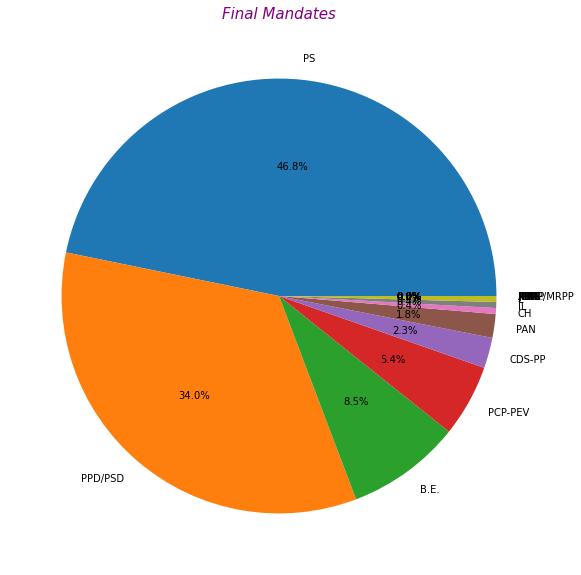

In [67]:
plt.pie(party_finalmandates.FinalMandates,labels=party_finalmandates.Party,autopct='%1.1f%%')
plt.setp(plt.title('Final Mandates',fontsize=15),color='purple',style='italic')
plt.show()

# Droping unwanted features

In [68]:
df.drop(['Mandates','time'],inplace=True,axis=1)

In [100]:
df.drop(['totalMandates'],inplace=True,axis=1)

# Data Encoding 

In [69]:
df['territoryName'].value_counts()

Territory National    84
Aveiro                80
Beja                  65
Porto                 63
Leiria                63
Braga                 63
Coimbra               60
Lisboa                60
Madeira               60
Setabal               60
Viana do Castelo      60
Viseu                 60
Avora                 57
Faro                  57
Guarda                57
Santaraam             57
Castelo Branco        54
Bragana               54
Portalegre            51
Vila Real             48
Name: territoryName, dtype: int64

In [70]:
df['territoryName']=df['territoryName'].replace({'Territory National':1,'Aveiro':2,'Beja':3,'Porto':4,'Leiria':5,'Braga':6,'Coimbra':7,'Lisboa':8,'Madeira':9,'Setabal':10,'Viana do Castelo':11,'Viseu':12,'Avora':13,'Faro':14,'Guarda':15,'Santaraam':16,'Castelo Branco':17,'Bragana':18,'Portalegre':19,'Vila Real':20})

In [71]:
df['Party'].value_counts()

PS           63
PCTP/MRPP    63
PNR          63
PDR          63
IL           63
PPD/PSD      63
A            63
L            63
CH           63
PAN          63
PCP-PEV      63
CDS-PP       63
B.E.         63
R.I.R.       59
PPM          59
MPT          57
NC           56
PURP         56
PTP          56
JPP          29
MAS          22
Name: Party, dtype: int64

In [72]:
df['Party']=df['Party'].replace({'PS':1,'PCTP/MRPP':2,'PNR':3,'PDR':4,'IL':5,'PPD/PSD':6,'A':7,'L':8,'CH':9,'PAN':10,'PCP-PEV':11,'CDS-PP':12,'B.E.':13,'R.I.R.':14,'PPM':15,'MPT':16,'NC':17,'PURP':18,'PTP':19,'JPP':20,'MAS':21})

# Correlation

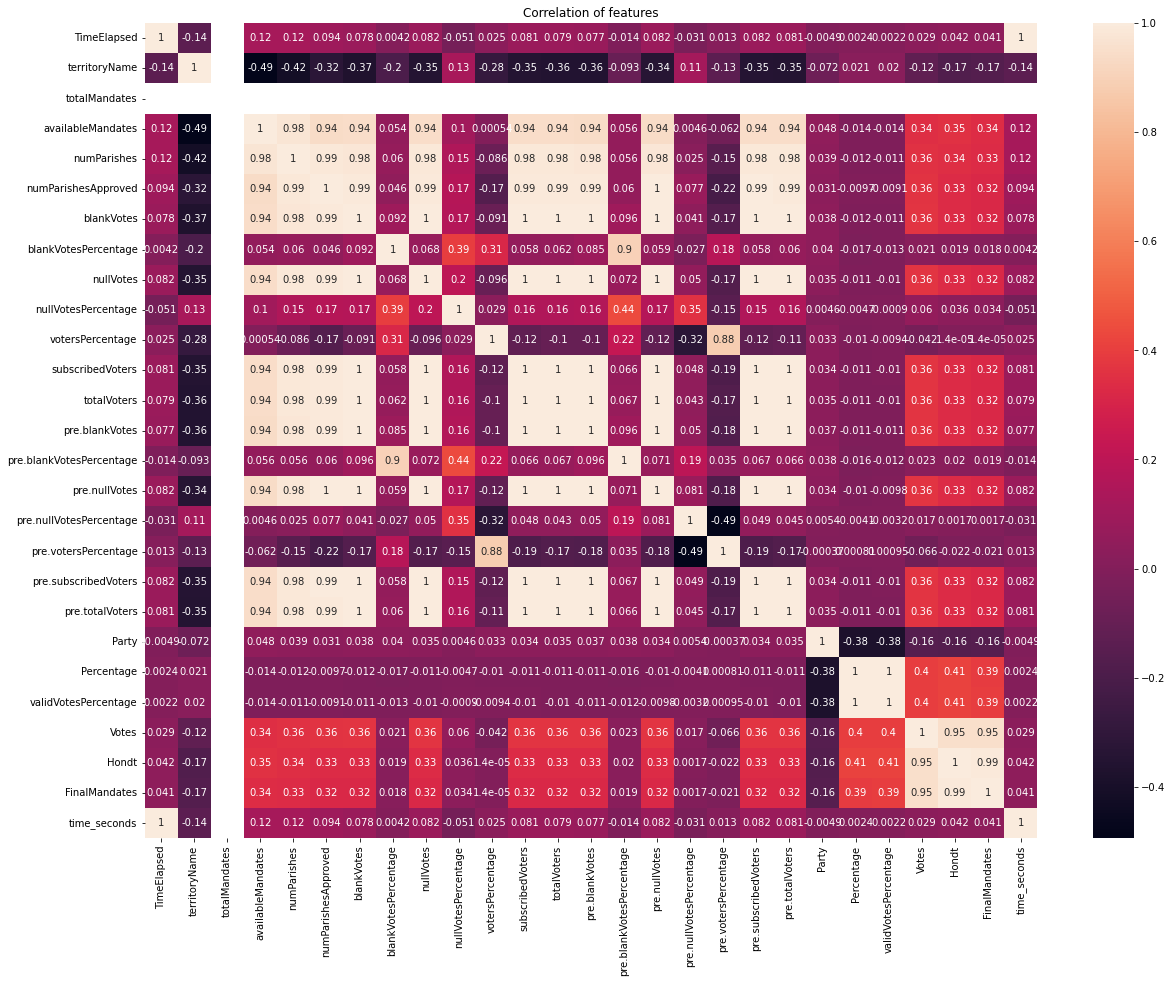

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),color="blue",annot=True)
plt.title('Correlation of features')
plt.show()

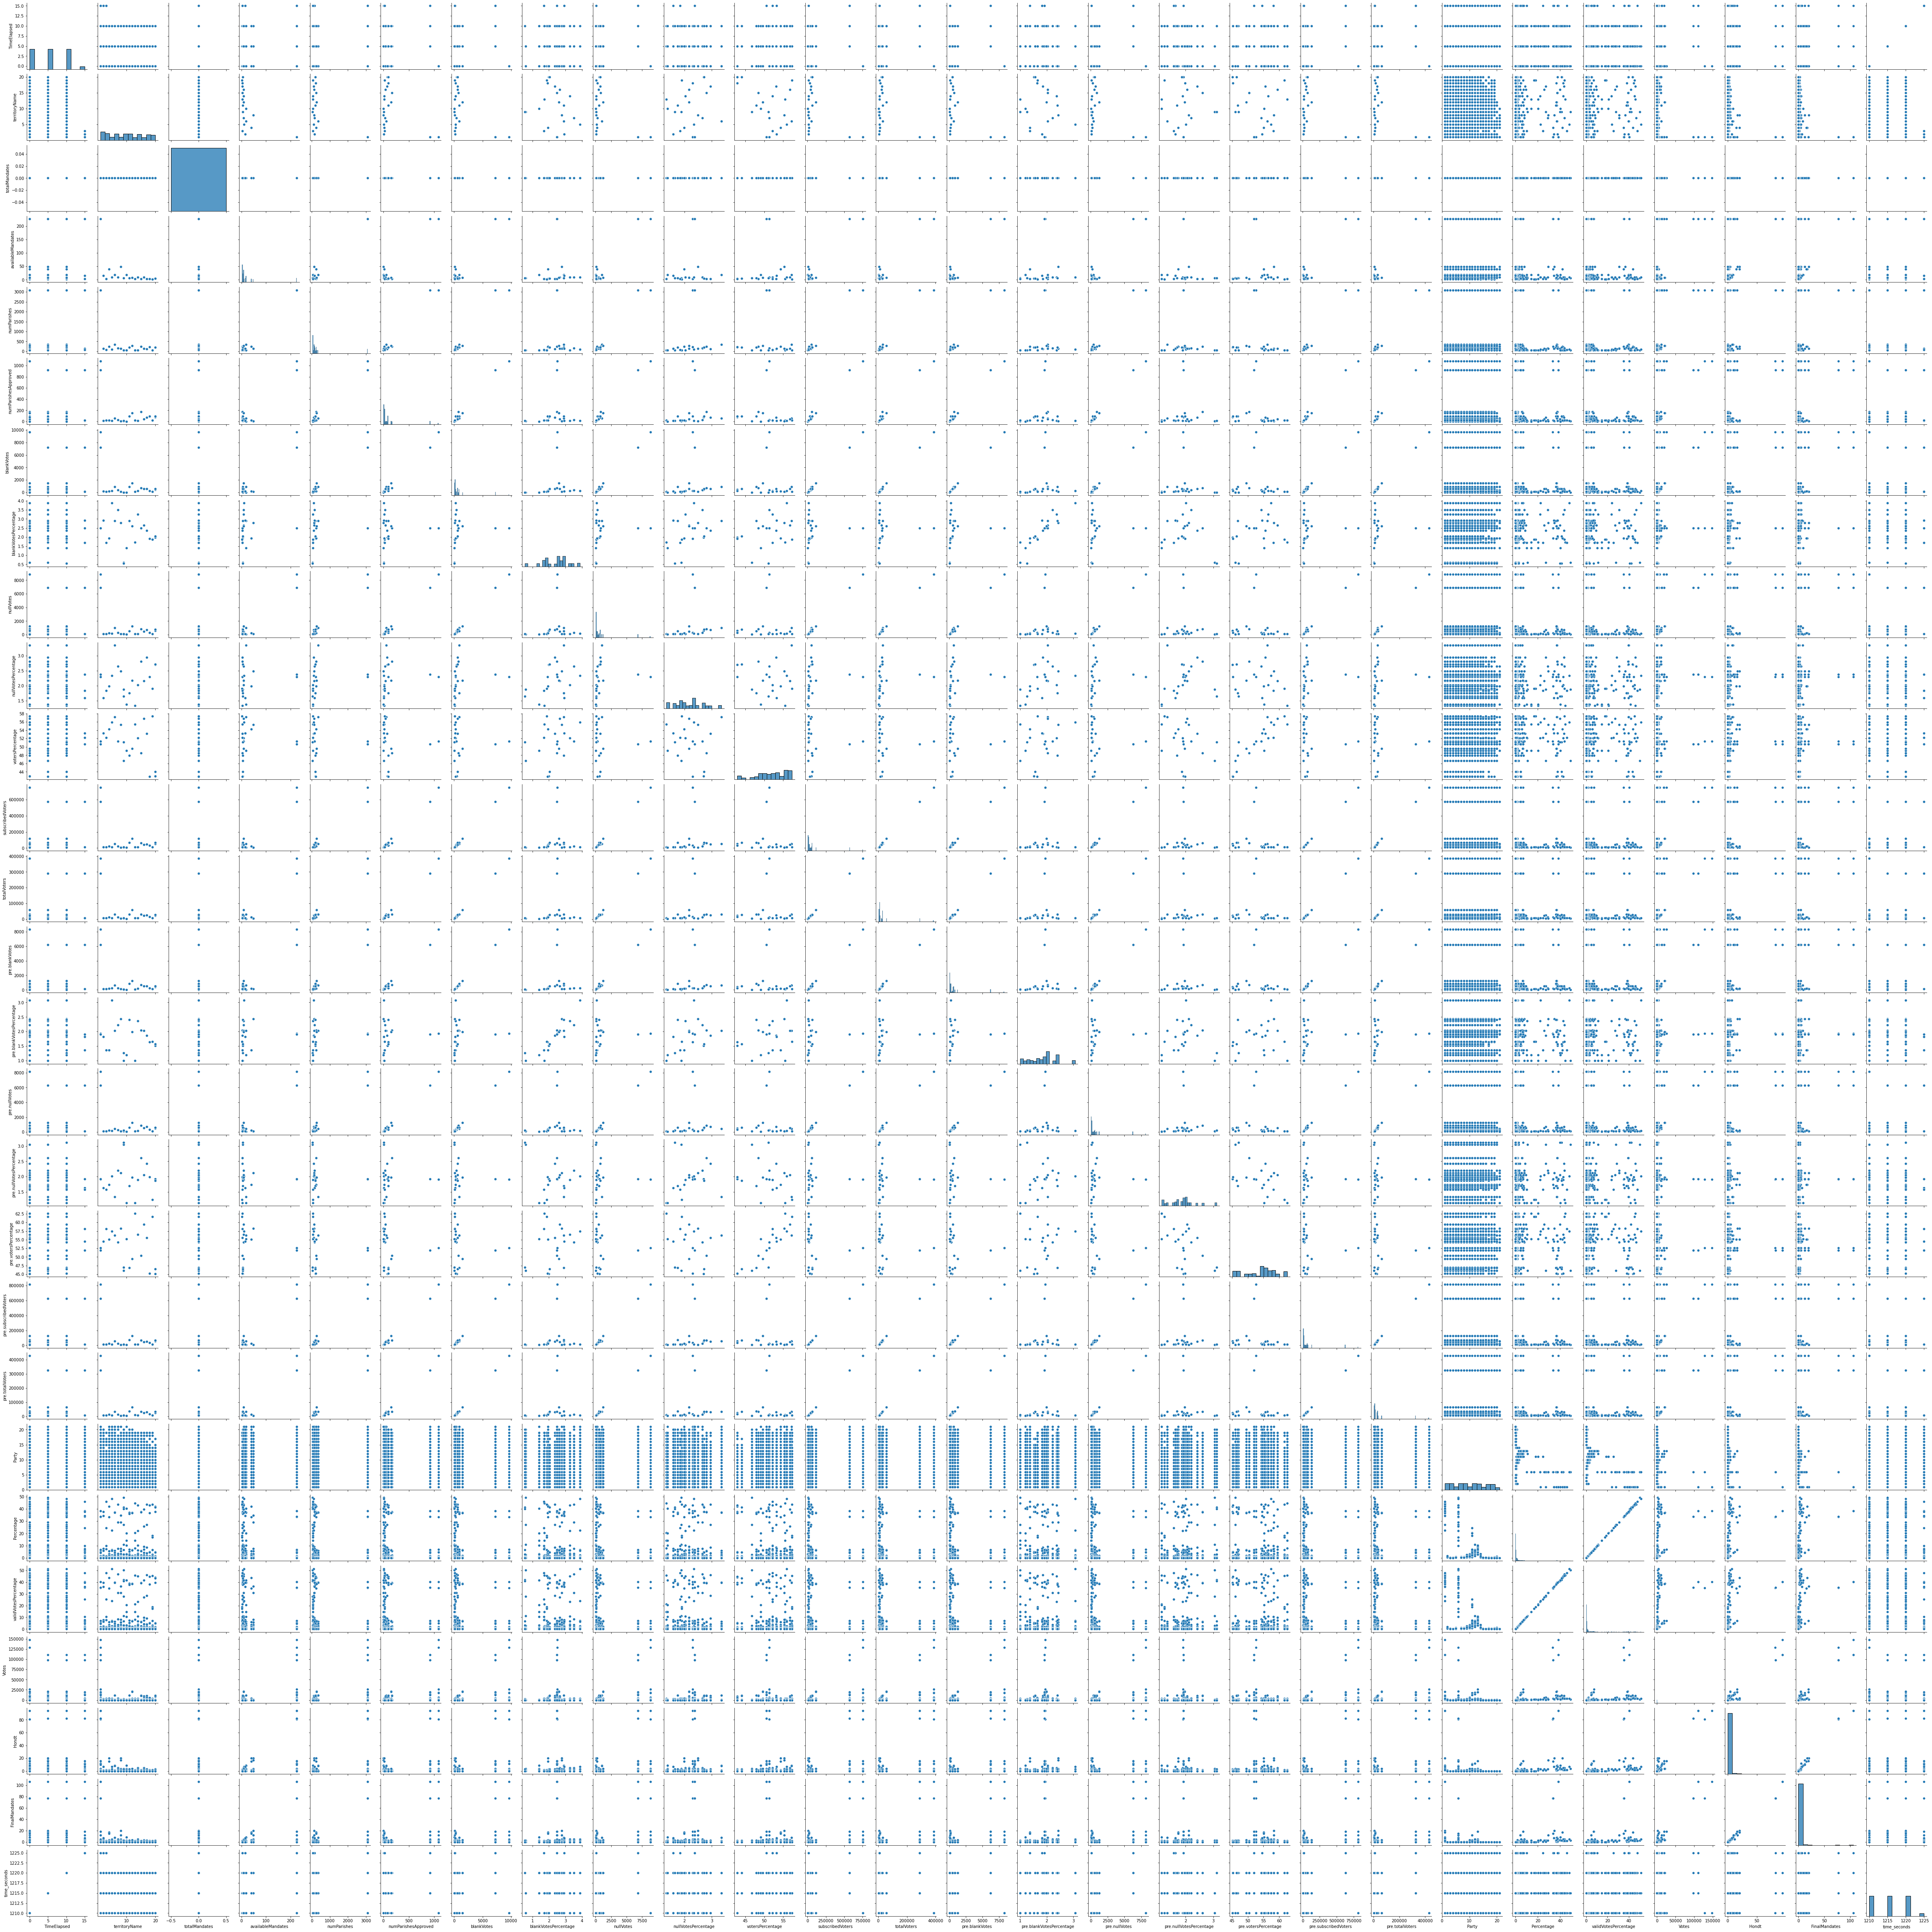

In [74]:
sns.pairplot(df)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               1213 non-null   int64  
 1   territoryName             1213 non-null   int64  
 2   totalMandates             1213 non-null   int64  
 3   availableMandates         1213 non-null   int64  
 4   numParishes               1213 non-null   int64  
 5   numParishesApproved       1213 non-null   int64  
 6   blankVotes                1213 non-null   int64  
 7   blankVotesPercentage      1213 non-null   float64
 8   nullVotes                 1213 non-null   int64  
 9   nullVotesPercentage       1213 non-null   float64
 10  votersPercentage          1213 non-null   float64
 11  subscribedVoters          1213 non-null   int64  
 12  totalVoters               1213 non-null   int64  
 13  pre.blankVotes            1213 non-null   int64  
 14  pre.blan

# Checking for outliers

TimeElapsed                    AxesSubplot(0.125,0.749828;0.110714x0.130172)
territoryName               AxesSubplot(0.257857,0.749828;0.110714x0.130172)
totalMandates               AxesSubplot(0.390714,0.749828;0.110714x0.130172)
availableMandates           AxesSubplot(0.523571,0.749828;0.110714x0.130172)
numParishes                 AxesSubplot(0.656429,0.749828;0.110714x0.130172)
numParishesApproved         AxesSubplot(0.789286,0.749828;0.110714x0.130172)
blankVotes                     AxesSubplot(0.125,0.593621;0.110714x0.130172)
blankVotesPercentage        AxesSubplot(0.257857,0.593621;0.110714x0.130172)
nullVotes                   AxesSubplot(0.390714,0.593621;0.110714x0.130172)
nullVotesPercentage         AxesSubplot(0.523571,0.593621;0.110714x0.130172)
votersPercentage            AxesSubplot(0.656429,0.593621;0.110714x0.130172)
subscribedVoters            AxesSubplot(0.789286,0.593621;0.110714x0.130172)
totalVoters                    AxesSubplot(0.125,0.437414;0.110714x0.130172)

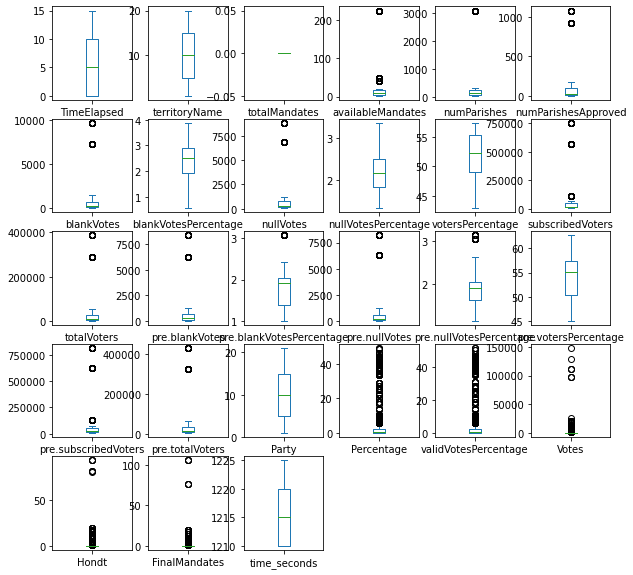

In [76]:
df.plot(kind='box',subplots=True,layout=(5,6))

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,TimeElapsed,territoryName,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,time_seconds
0,1.212183,1.519502,3.581767,3.645201,4.098175,4.504910,0.118100,4.398994,0.226227,0.126622,...,0.295250,4.418612,4.468821,1.615994,3.050616,3.058732,15.222820,12.360173,13.402391,1.212183
1,1.212183,1.519502,3.581767,3.645201,4.098175,4.504910,0.118100,4.398994,0.226227,0.126622,...,0.295250,4.418612,4.468821,0.741607,2.592117,2.598524,13.206799,10.626675,9.689906,1.212183
2,1.212183,1.519502,3.581767,3.645201,4.098175,4.504910,0.118100,4.398994,0.226227,0.126622,...,0.295250,4.418612,4.468821,0.482535,0.169667,0.170866,2.557140,1.959186,2.264936,1.212183
3,1.212183,1.519502,3.581767,3.645201,4.098175,4.504910,0.118100,4.398994,0.226227,0.126622,...,0.295250,4.418612,4.468821,0.307657,0.005130,0.004659,1.788577,1.425802,0.472701,1.212183
4,1.212183,1.519502,3.581767,3.645201,4.098175,4.504910,0.118100,4.398994,0.226227,0.126622,...,0.295250,4.418612,4.468821,0.132780,0.033501,0.031730,1.667214,1.292456,1.368819,1.212183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2.122008,1.175502,0.429363,0.377842,0.375888,0.413909,0.960611,0.402773,0.668832,0.095698,...,0.824805,0.384420,0.374137,0.916485,0.417871,0.417711,0.178003,0.174350,0.167382,2.122008
1209,2.122008,1.175502,0.429363,0.377842,0.375888,0.413909,0.960611,0.402773,0.668832,0.095698,...,0.824805,0.384420,0.374137,0.566730,0.426108,0.426443,0.178732,0.174350,0.167382,2.122008
1210,2.122008,1.175502,0.429363,0.377842,0.375888,0.413909,0.960611,0.402773,0.668832,0.095698,...,0.824805,0.384420,0.374137,1.007167,0.428853,0.429063,0.178940,0.174350,0.167382,2.122008
1211,2.122008,1.175502,0.429363,0.377842,0.375888,0.413909,0.960611,0.402773,0.668832,0.095698,...,0.824805,0.384420,0.374137,1.091362,0.435259,0.435176,0.179461,0.174350,0.167382,2.122008


In [107]:
df.shape

(1213, 26)

In [114]:
df=df[(z<=3.5).all(axis=1)]

In [115]:
df.shape

(1108, 26)

In [116]:
loss=(1213-1108)*100/1213
print(loss)

8.656224237427864


In [118]:
X=df.drop(columns=['FinalMandates'],axis=1)
y=df['FinalMandates']

# Removing Multicollenaearity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_clac():
    vif=pd.DataFrame()
    vif['Vif Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    print(vif)

In [120]:
vif_clac()

      Vif Factor                  Features
0       3.452013               TimeElapsed
1      10.491678             territoryName
2      49.561949         availableMandates
3     542.230451               numParishes
4     749.720682       numParishesApproved
5    5962.366612                blankVotes
6     168.260309      blankVotesPercentage
7    1507.618789                 nullVotes
8     183.418469       nullVotesPercentage
9     293.257130          votersPercentage
10  25250.982436          subscribedVoters
11  49484.137201               totalVoters
12   6797.249599            pre.blankVotes
13    196.409031  pre.blankVotesPercentage
14    498.825376             pre.nullVotes
15    121.048020   pre.nullVotesPercentage
16    856.672818      pre.votersPercentage
17  51626.422405      pre.subscribedVoters
18  68061.153506           pre.totalVoters
19      1.142115                     Party
20  11667.461111                Percentage
21  11849.492039      validVotesPercentage
22      3.9

So we can drop the following columns based on VIF value to stop multicollnearity


(i) numParishesApproved
(ii) blankVotes
(iii) nullVotes
(iv) totalVoters
(v) pre.votersPercentage
(vi) pre.totalVoters
(vii) validVotesPercentage
(viii) time_seconds
(ix) pre.nullVotes
(x) validVotesPercentage
(xi) pre.blankVotesPercentage

In [126]:
X.drop(['numParishesApproved','blankVotes','nullVotes','totalVoters',
'pre.votersPercentage',
'pre.totalVoters',
'validVotesPercentage',
'time_seconds',
'pre.nullVotes',
'validVotesPercentage',
'pre.blankVotesPercentage'],axis=1,inplace=True)

In [128]:
X.shape

(1108, 15)

In [127]:
X.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,subscribedVoters,pre.blankVotes,pre.nullVotesPercentage,pre.subscribedVoters,Party,Percentage,Votes,Hondt
21,0,2,16,147,2.92,1.59,53.3,11953,124,1.63,12511,6,37.75,2405,7
22,0,2,16,147,2.92,1.59,53.3,11953,124,1.63,12511,1,34.33,2187,7
23,0,2,16,147,2.92,1.59,53.3,11953,124,1.63,12511,13,7.47,476,1
24,0,2,16,147,2.92,1.59,53.3,11953,124,1.63,12511,12,6.14,391,1
25,0,2,16,147,2.92,1.59,53.3,11953,124,1.63,12511,11,2.39,152,0


In [129]:
X.columns

Index(['TimeElapsed', 'territoryName', 'availableMandates', 'numParishes',
       'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'pre.blankVotes', 'pre.nullVotesPercentage',
       'pre.subscribedVoters', 'Party', 'Percentage', 'Votes', 'Hondt'],
      dtype='object')

In [130]:
scaled_cols=['TimeElapsed', 'availableMandates', 'numParishes',
       'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'pre.blankVotes', 'pre.nullVotesPercentage',
       'pre.subscribedVoters', 'Percentage', 'Votes', 'Hondt']

# Scaling of Data

In [133]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# Removing Skewness 

In [134]:
X.skew()

TimeElapsed                0.151283
territoryName              0.078657
availableMandates          1.835544
numParishes                0.594366
blankVotesPercentage      -0.301536
nullVotesPercentage        0.418278
votersPercentage          -0.615389
subscribedVoters           1.432490
pre.blankVotes             1.318374
pre.nullVotesPercentage    0.530915
pre.subscribedVoters       1.454985
Party                      0.063127
Percentage                 2.882577
Votes                      5.472595
Hondt                      6.250434
dtype: float64

In [137]:
# removing the skew ness
skew_cols=['Votes','Hondt']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
X[skew_cols]=scaler.fit_transform(X[skew_cols].values)
X.skew()

TimeElapsed                0.151283
territoryName              0.078657
availableMandates          1.835544
numParishes                0.594366
blankVotesPercentage      -0.301536
nullVotesPercentage        0.418278
votersPercentage          -0.615389
subscribedVoters           1.432490
pre.blankVotes             1.318374
pre.nullVotesPercentage    0.530915
pre.subscribedVoters       1.454985
Party                      0.063127
Percentage                 2.882577
Votes                      1.254466
Hondt                      2.173126
dtype: float64

# Finding best random state

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [152]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy is ",maxAcc,"on Random State",maxRS)

Best Accuracy is  0.6758143910986578 on Random State 64


In [153]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=64)

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LinearRegression

In [155]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
svr=SVR()
sgd=SGDRegressor()
R=Ridge()
L=Lasso()
model=[lr,rfr,dtr,knn,svr,sgd,R,L]

In [156]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Model :",m)
    print("r2 Score",r2_score(y_test,y_pred))
    print("MSE :",mean_squared_error(y_test,y_pred))
    print("MAE :",mean_absolute_error(y_test,y_pred))
    print(20*"---")

Model : LinearRegression()
r2 Score 0.6758143910986578
MSE : 1.2743775490242357
MAE : 0.5621971994847635
------------------------------------------------------------
Model : RandomForestRegressor()
r2 Score 0.9836950654498906
MSE : 0.06409489489489491
MAE : 0.07981981981981984
------------------------------------------------------------
Model : DecisionTreeRegressor()
r2 Score 0.9923607383243176
MSE : 0.03003003003003003
MAE : 0.03003003003003003
------------------------------------------------------------
Model : KNeighborsRegressor()
r2 Score 0.9127290746170046
MSE : 0.3430630630630631
MAE : 0.1753753753753754
------------------------------------------------------------
Model : SVR()
r2 Score 0.8007817602699179
MSE : 0.783129309559841
MAE : 0.2496288649498478
------------------------------------------------------------
Model : SGDRegressor()
r2 Score 0.6783246097716564
MSE : 1.2645098490641666
MAE : 0.5518379784941659
------------------------------------------------------------
Model

In [149]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [157]:
for m in model:
    print(m,'Cross Validation Score:')
    print(cross_val_score(m,X,y,cv=ShuffleSplit(10)).mean())

LinearRegression() Cross Validation Score:
0.5658125028133083
RandomForestRegressor() Cross Validation Score:
0.9972141485738975
DecisionTreeRegressor() Cross Validation Score:
0.9838829154010794
KNeighborsRegressor() Cross Validation Score:
0.9326826381695504
SVR() Cross Validation Score:
0.8566194066927398
SGDRegressor() Cross Validation Score:
0.5504240030805525
Ridge() Cross Validation Score:
0.5239235203316583
Lasso() Cross Validation Score:
0.4070554867455143


Found Decision Tree Regressor is the best algorithm with 99% accuracy, 0.03 MSE and 98 % cross validation score

# Hyper Parameter Tuning

In [159]:
from sklearn.model_selection import GridSearchCV

In [183]:
parameter={'criterion':['squred_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':[10,20,30],'max_features':["auto","sqrt","log2"],'min_samples_leaf':[5,6,8],'min_samples_split':[5,10],'random_state':[30,40,50,60,64,70,75]}

In [184]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5,n_jobs=-1,verbose=1)

In [185]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squred_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 6, 8],
                         'min_samples_split': [5, 10],
                         'random_state': [30, 40, 50, 60, 64, 70, 75],
                         'splitter': ['best', 'random']},
             verbose=1)

In [186]:
print(GCV.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 5, 'random_state': 75, 'splitter': 'random'}


In [187]:
fin_mod=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,max_features='auto',min_samples_leaf=8,min_samples_split=5,splitter='random',random_state=75)

In [188]:
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

96.87554149982563


The final model is performing with 97% accuracy which is much acceptable.

# Saving the model

In [189]:
import joblib 
joblib.dump(fin_mod,'Election_Prediction.pkl')

['Election_Prediction.pkl']